## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
count_mice = combined_data["Mouse ID"].nunique()
count_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = pd.DataFrame(duplicate_mice)
duplicate_df

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
working_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [7]:
# Checking the number of mice in the clean DataFrame.
count_mice_2 = working_df["Mouse ID"].nunique()
count_mice_2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = working_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]


median_tumor = working_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]


variance_tumor = working_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]


standard_dev_tumor = working_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]


sem_tumor = working_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({'Mean': mean_tumor, 'Median': median_tumor, 'Variance':variance_tumor,
                             "Standard Deviation": standard_dev_tumor, 'SEM': sem_tumor})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = working_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

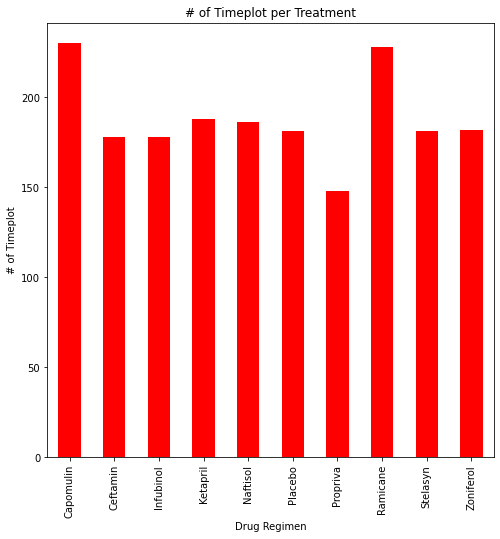

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_mice_treat = working_df.groupby(["Drug Regimen"]).count()["Timepoint"]

visual_pandas = count_mice_treat.plot.bar(figsize=(8,8), color='r', fontsize = 10)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timeplot")
plt.title("# of Timeplot per Treatment")
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Number of Timeplots')

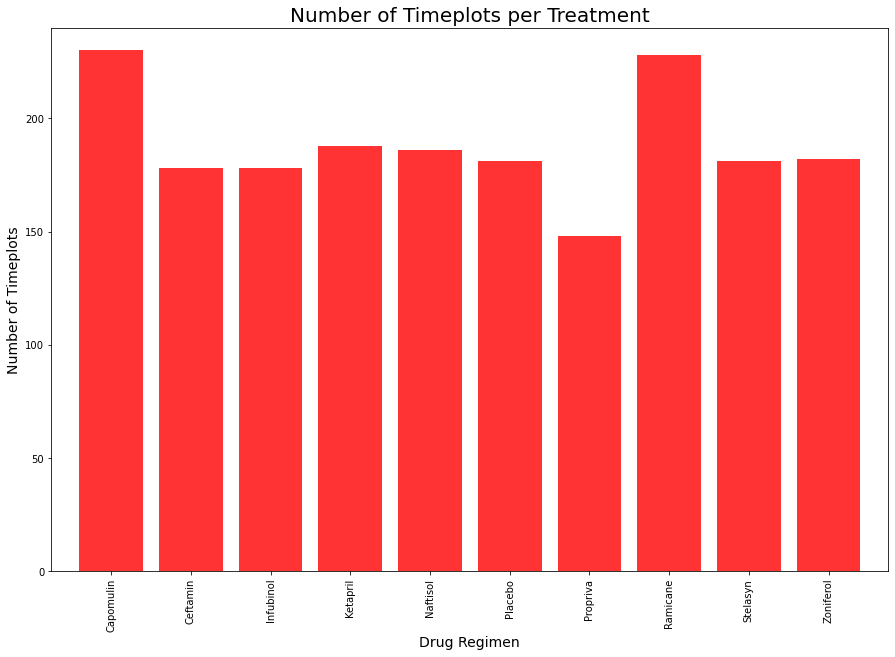

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


# create an array that contains number of mice for regimen
mice_list =(working_df.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()

x_axis = np.arange(len(count_mice_treat))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='r', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Timeplots per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Timeplots",fontsize = 14)

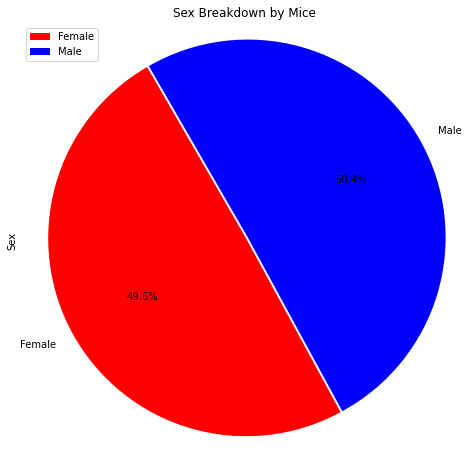

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the genders 
gender_data = working_df.groupby(['Mouse ID', "Sex"])
gender_df = pd.DataFrame(gender_data.size())

# Make frame with total count of F and M 

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())

mouse_gender.columns = ["Total Count"]

#Format the the percentage of female vs male 

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#Pie plot basics 
colors = ["red", "blue"]
explode = (.01,0)
plot = mouse_gender.plot.pie(y='Total Count', figsize=(8,8),
colors = colors, startangle=120, explode = explode, autopct="%1.1f%%")

plt.title("Sex Breakdown by Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

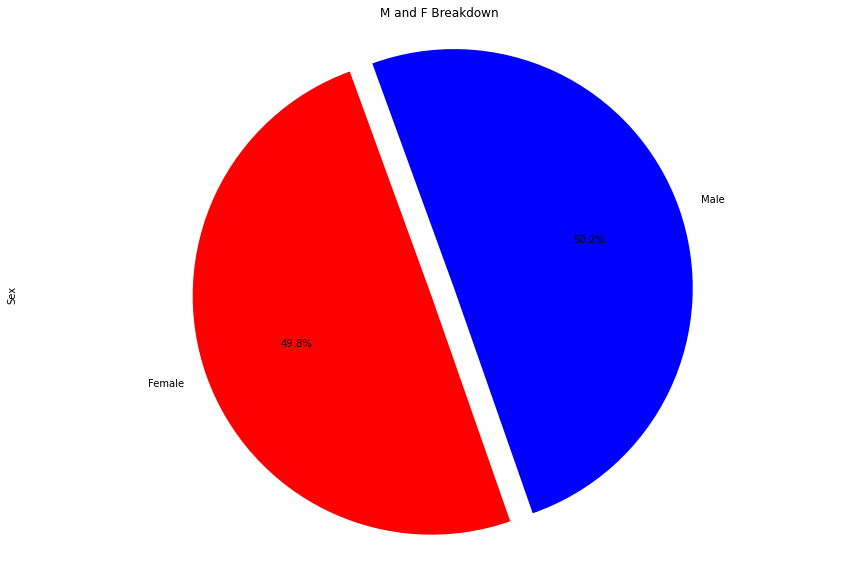

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Make Labels for the sections 
labels = ["Female","Male"]

#Use the size values from previous section 

sizes = [49.79,50.20]

#Set colors for each section 

colors = ['red','blue']

explode = (0.1,0)

# Create pie chart 
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=110)
plt.title("M and F Breakdown")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ram_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane",:]
inf_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol",:]
ceft_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin",:]
cap_df.head()
# Start by getting the last (greatest) timepoint for each mouse

caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
caplastmerge = pd.merge(caplastvol, combined_data, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_regimes = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

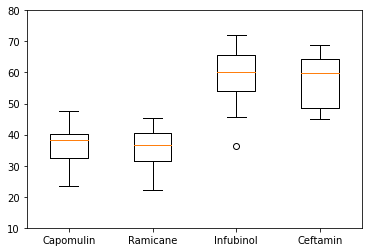

In [18]:
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()
    

## Line and Scatter Plots

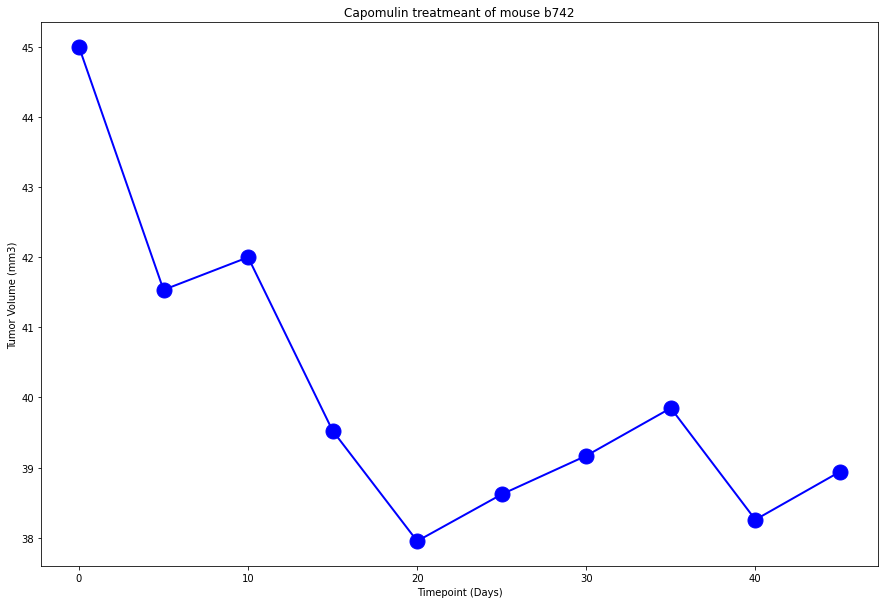

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Generate a random mouse ID to be used 
forline_df = cap_df.loc[cap_df["Mouse ID"] == "b742",:]
forline_df.head()

# Determine what the axis will be 
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

#Create the line plot wiht labels
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()
plt.tight_layout()

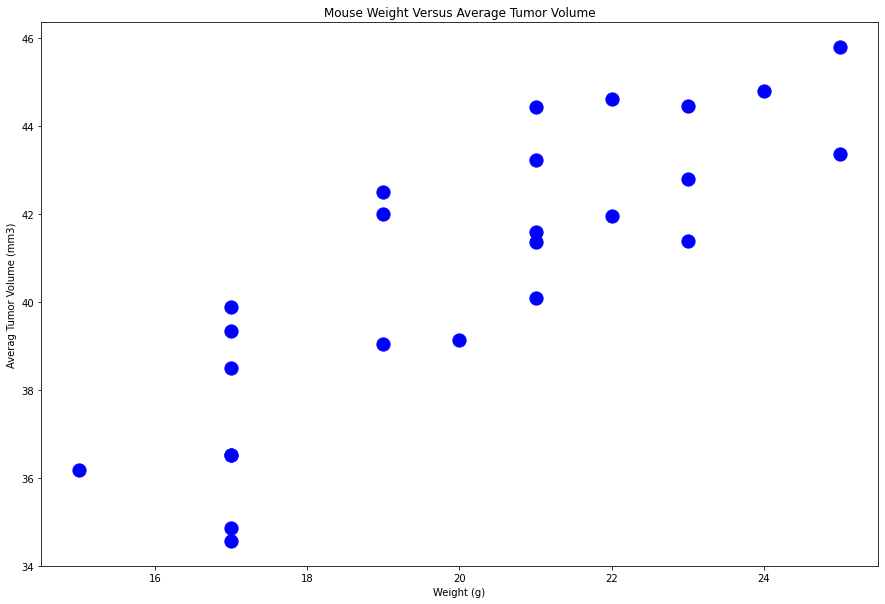

<Figure size 432x288 with 0 Axes>

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Determine the axis and create the figure for the plot 
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =cap_df.groupby(['Mouse ID']).mean()

#Determine parameters and label for scatter plot
marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',)
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()
plt.tight_layout()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)

In [29]:
#Generate all of the x and y values for the plot

x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

#Create the linder regression formula and parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Label the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The r-squared is: 0.7088568047708717


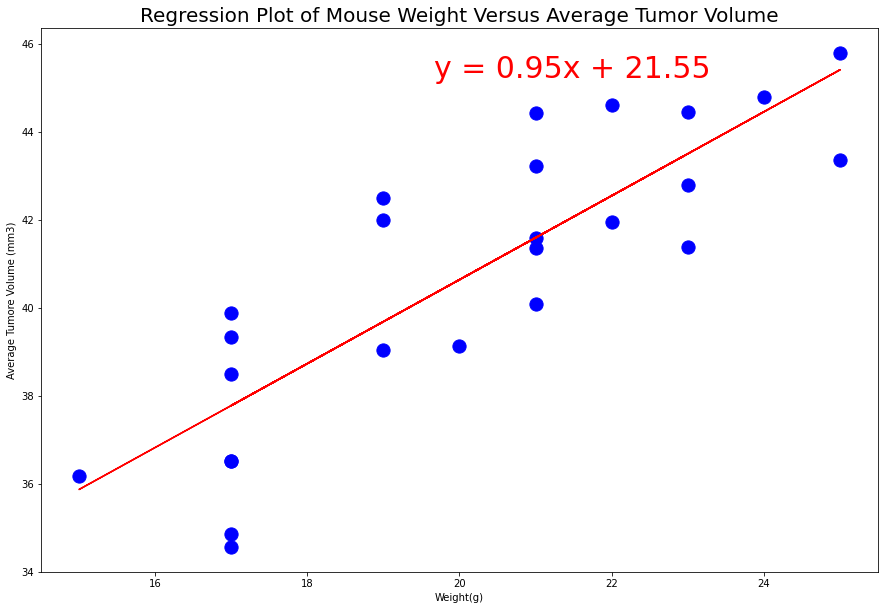

<Figure size 432x288 with 0 Axes>

In [30]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.tight_layout()